> # **Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.


> # **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.




> # **Basics of DataSet**




The company collected the data on individuals who purchased a treadmill from the AeroFit
stores during the prior three months. The dataset has the following features:
Dataset link: Aerofit_treadmill.csv
(https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadm
1639992749)

*   Product Purchased: KP281, KP481, or KP781

*   Age: In years

*   Gender: Male/Female

*   Education: In years

*   MaritalStatus: Single or partnered

*   Usage: The average number of times the customer plans to use the treadmill each week.

*   Income: Annual income (in $)

*   Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent

*   Miles: The average number of miles the customer expects to walk/run each week

*   Product Portfolio:
    1.   The KP281 is an entry-level treadmill that sells for $1,500.
    2.   The KP481 is for mid-level runners that sell for $1,750.
    3.   The KP781 treadmill is having advanced features that sell for $2,500.





# **Importing Libraries**

In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# **Loading File**

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit-data.csv

--2024-03-20 15:44:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.94, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit-data.csv’

aerofit-data.csv    100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 15:44:30 (160 MB/s) - ‘aerofit-data.csv’ saved [7279/7279]



In [3]:
#Loading the Dataset

data = pd.read_csv("aerofit-data.csv")

# **Basic Information**

In [4]:
#The top 5 and the last 5 entries

data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
#Details of Columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Number of columns and rows

data.shape

(180, 9)

In [7]:
#Data-types of Columns

data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
#Changing the data-type from object to category

data['Product'] = data['Product'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')
data.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [9]:
#Description of data in a dataframe

data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000



> # Descriptive Analysis

* Total count of all columns is 180



* Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.
* Education: Mean Education is 15 with maximum as 21 and minimum as 12.
* Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* Fitness: Average rating is 3.3 on a scale of 1 to 5.
* Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
* Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K


# **Number of Unique Entries**

In [10]:
#Number of unique Products

data['Product'].nunique()

3

In [11]:
#Number of unique age of people

data['Age'].nunique()

32

In [12]:
#Number of unique genders

data['Gender'].nunique()

2

In [13]:
#Number of unique entries of fitness

data['Fitness'].nunique()

5

In [14]:
#Count of unique entries of education

data['Education'].nunique()

8

In [15]:
#Number of unique entries of Usage

data['Usage'].nunique()

6

# **Unique Entries**

In [16]:
#Name of all Products

data['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [17]:
#All entries of age

data['Age'].unique().tolist()

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 46,
 47,
 50,
 45,
 48,
 42]

In [18]:
#All unique entries of education

data['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [19]:
#Counting unique age entries

nProd = data['Product'].value_counts()
nProd

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [20]:
#Number of males and females

data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [21]:
#Count of entries of Fitness

nFit = data['Fitness'].value_counts()
nFit

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [22]:
#Count of Marrired and Unmarried People

nMariS = data['MaritalStatus'].value_counts()
nMariS

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [23]:
#Number of entries of Usage

nUse = data['Usage'].value_counts()
nUse

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [24]:
#Counting number of entries of specific ages

nAge = data['Age'].value_counts()
nAge

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

#**In Percentage**

In [25]:
#Percentage of users of all machines

(nProd/len(data))*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [26]:
#Calculating percentage of people's age

(nAge/len(data))*100

25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42     0.555556
Name: Age, dtype: float64

In [27]:
#Precentage of entries of  fitness

(nFit / len(data)) * 100

3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: Fitness, dtype: float64

In [28]:
#Percentage of married and unmarried people

(nMariS/len(data))*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

In [29]:
#Percentage of various entries of Usage

(nUse/len(data))* 100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

# Summary

*   KP281, KP481, KP781 are the 3 different products
*   Most commonly purchased treadmill product type is KP281
*   There are 32 unique ages
*   104 Males and 76 Females are in the customers list
*   8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
*   Highest rated Fitness rating is 3
*   Most customers usage treadmill atleast 3 days per week
*   Majority of the customers who have purchased are Married/Partnered


# **Univariate Graphs**

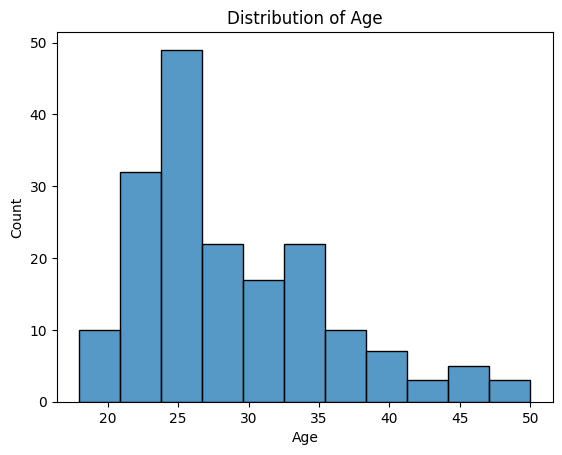

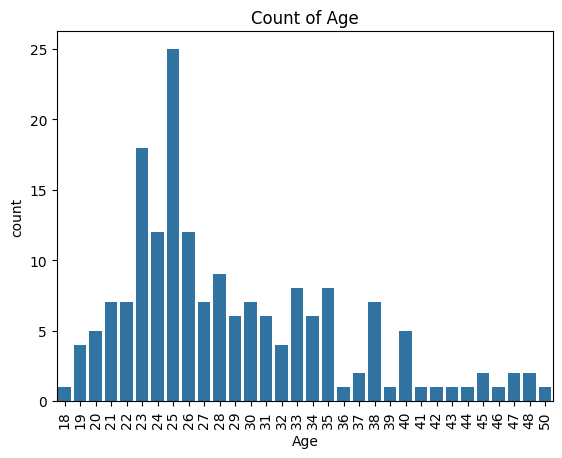

In [30]:
#Age
sns.histplot(data['Age'])
plt.title('Distribution of Age')
plt.show()

sns.countplot(x='Age', data=data)
plt.title('Count of Age')
plt.xticks(rotation=90)
plt.show()


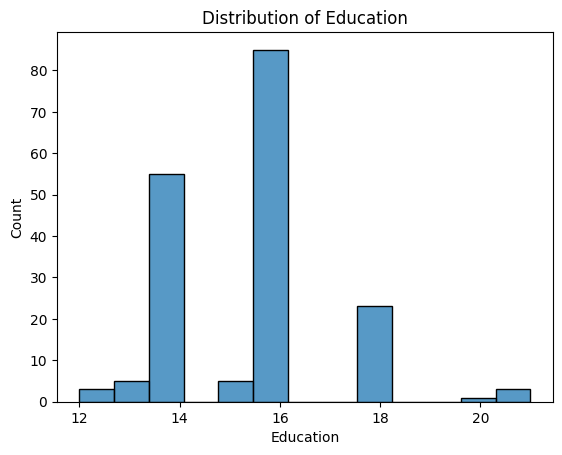

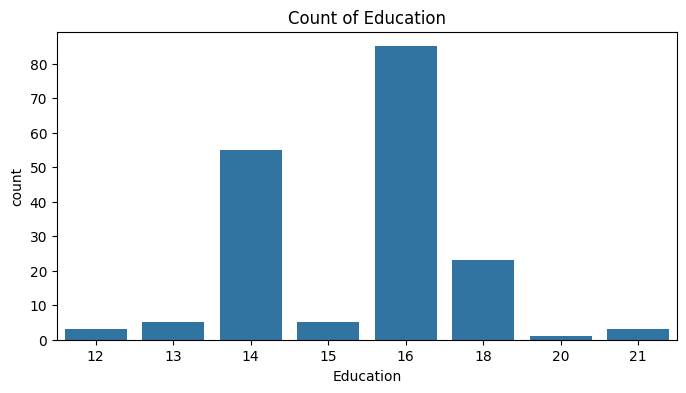

In [31]:
# Education
sns.histplot(data['Education'])
plt.title('Distribution of Education')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Education', data=data)
plt.title('Count of Education')
plt.show()

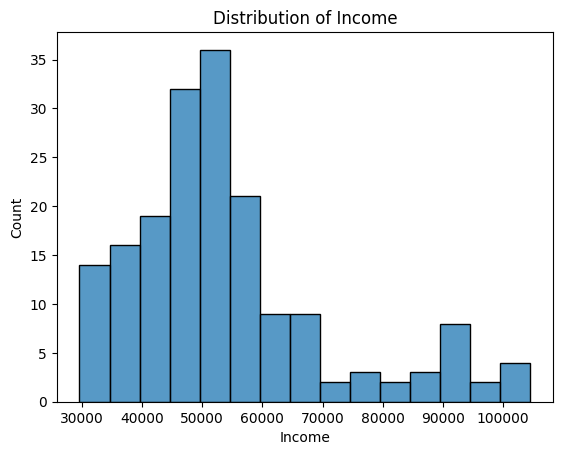

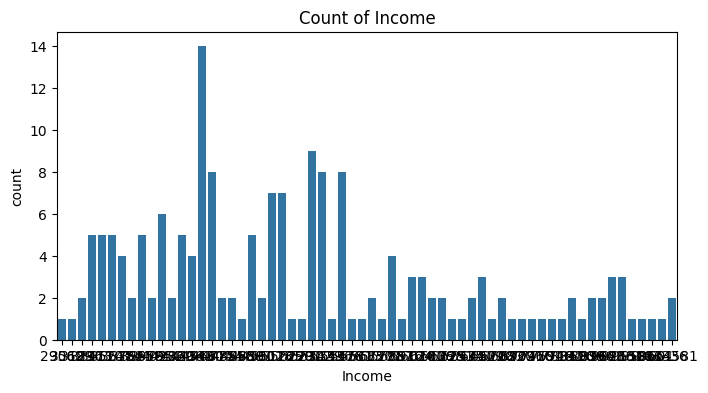

In [32]:
# Income
sns.histplot(data['Income'])
plt.title('Distribution of Income')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Income', data=data)
plt.title('Count of Income')
plt.show()

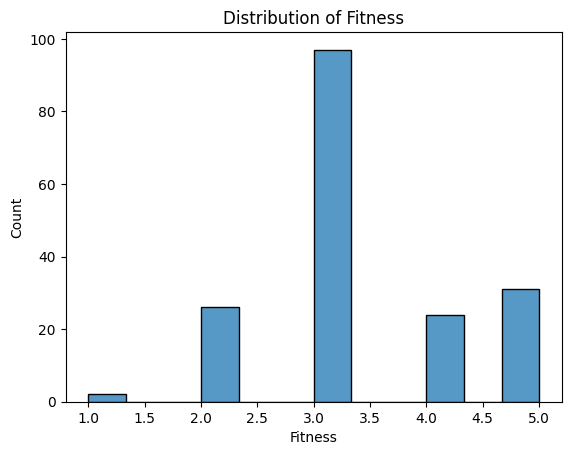

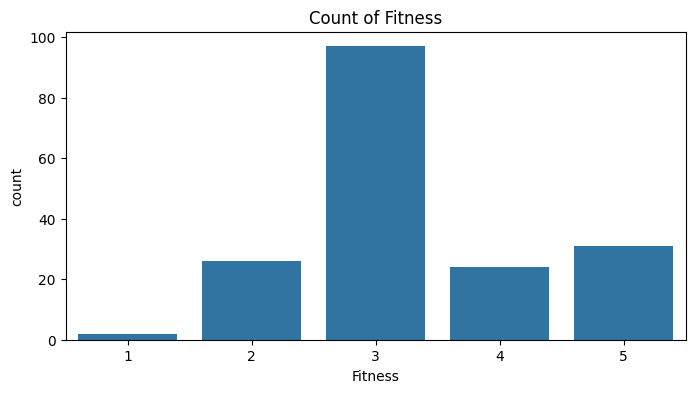

In [33]:
# Fitness
sns.histplot(data['Fitness'])
plt.title('Distribution of Fitness')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Fitness', data=data)
plt.title('Count of Fitness')
plt.show()

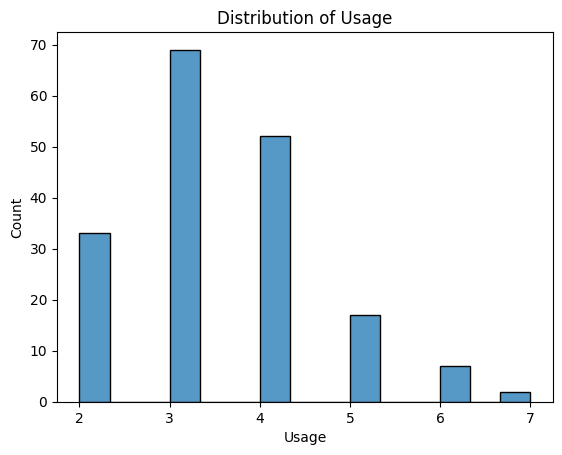

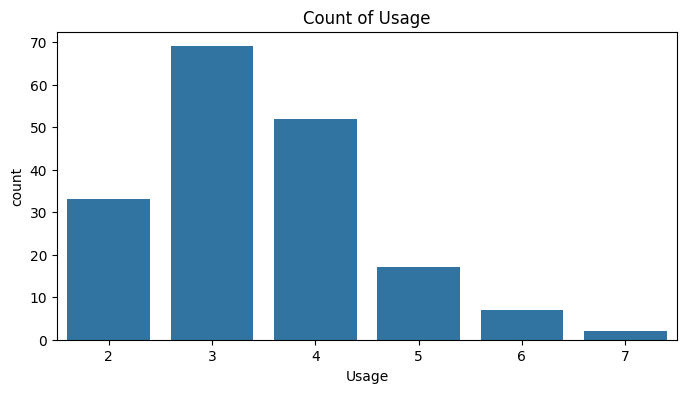

In [34]:
# Usage
sns.histplot(data['Usage'])
plt.title('Distribution of Usage')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Usage', data=data)
plt.title('Count of Usage')
plt.show()

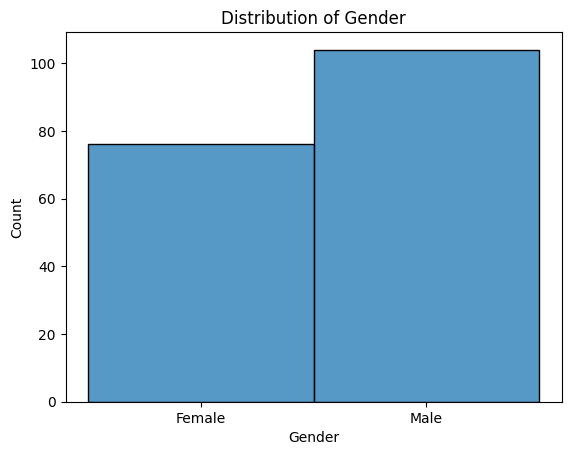

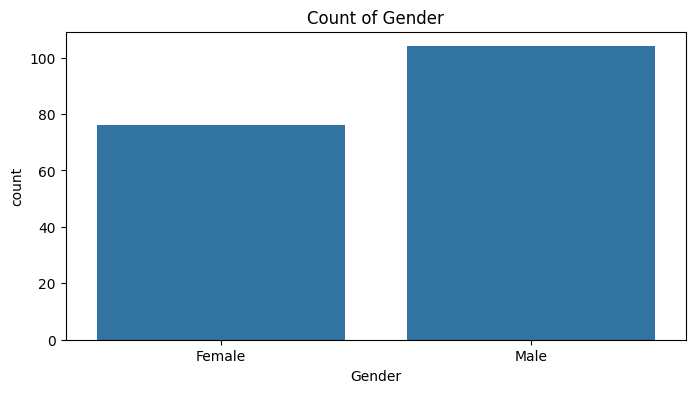

In [35]:
# Gender
sns.histplot(data['Gender'])
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')
plt.show()

# **Bivariate Analysis**

In [45]:
# Average usage of each product type by the customer
data.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [47]:
# Average Age of customer using each product
data.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [48]:
# Average Education of customer using each product Average Education of customer using each product
data.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

In [50]:
# Average customer fitness rating for each product type purchased
data.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

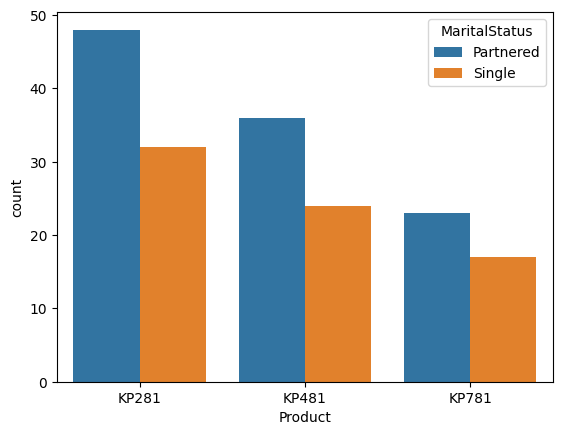

In [51]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=data,x='Product',hue='MaritalStatus')
plt.show()

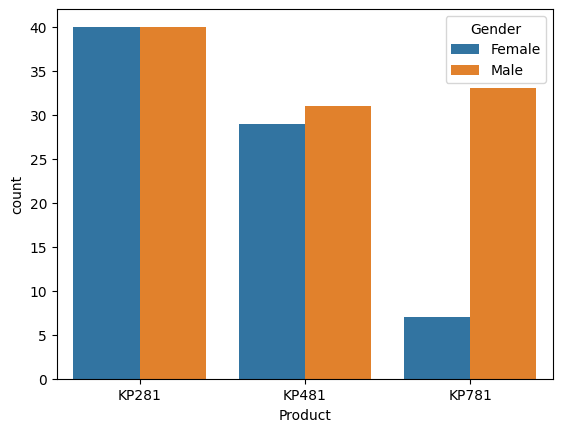

In [52]:
# Product purchased among Male and Female
sns.countplot(data=data,x='Product',hue='Gender')
plt.show()

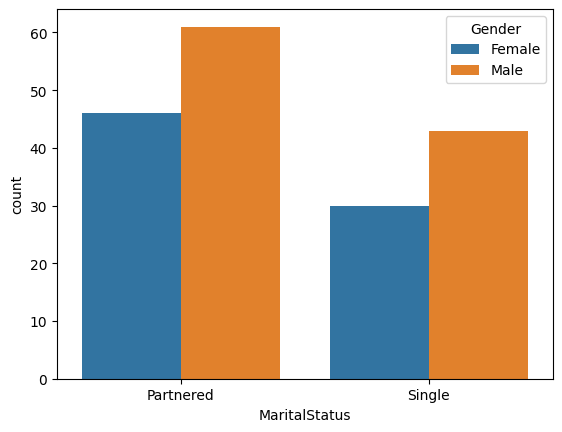

In [53]:
# Count among Gender and their Marital Status
sns.countplot(data=data,x='MaritalStatus',hue='Gender')
plt.show()

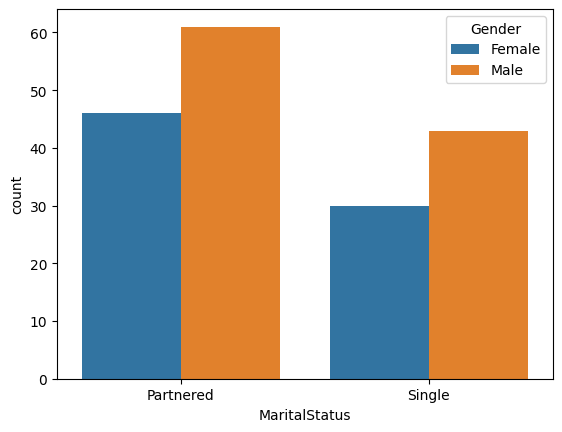

In [54]:
# Count among Gender and their Marital Status
sns.countplot(data=data,x='MaritalStatus',hue='Gender')
plt.show()

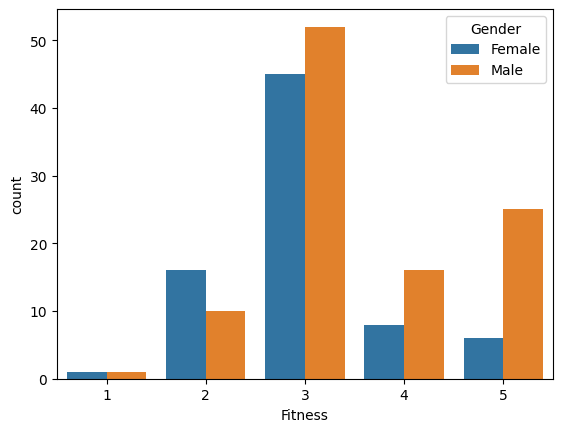

In [57]:
# Fitness rating among the customers categorised by Gender
sns.countplot(data=data,x='Fitness',hue='Gender')
plt.show()

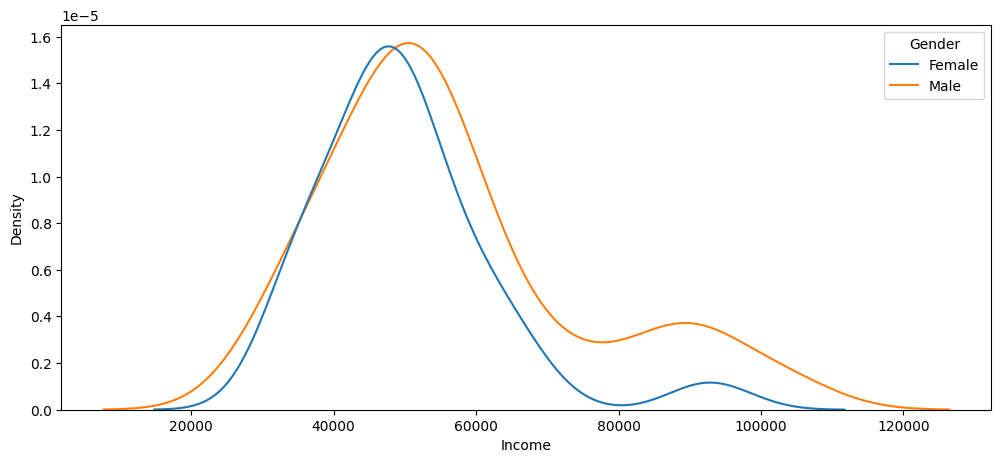

In [58]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Income',hue='Gender')
plt.show()

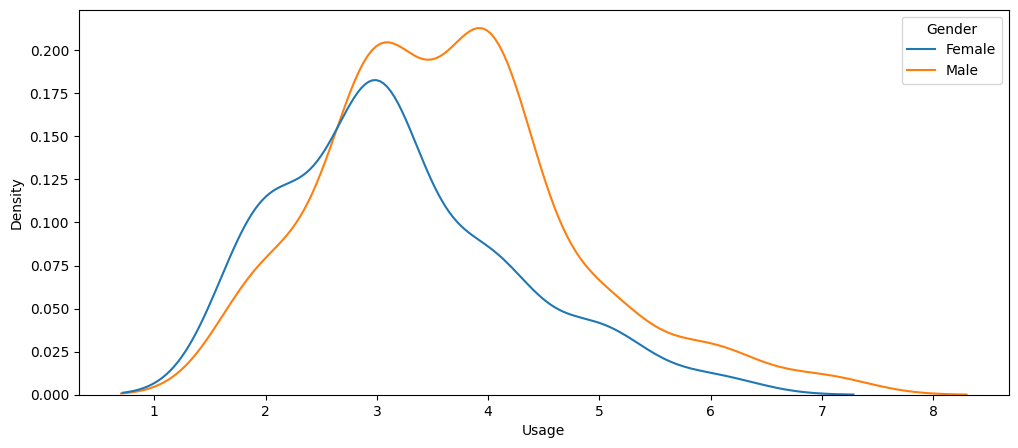

In [59]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Usage',hue='Gender')
plt.show()

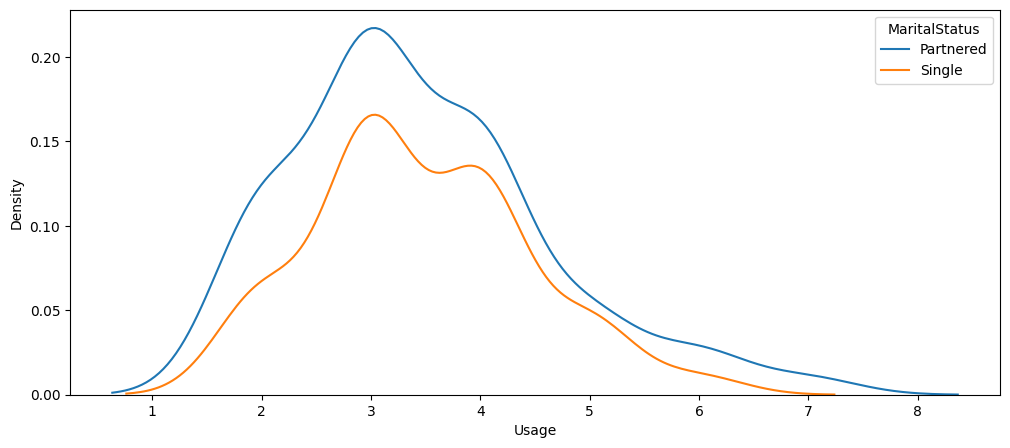

In [60]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Usage',hue='MaritalStatus')
plt.show()

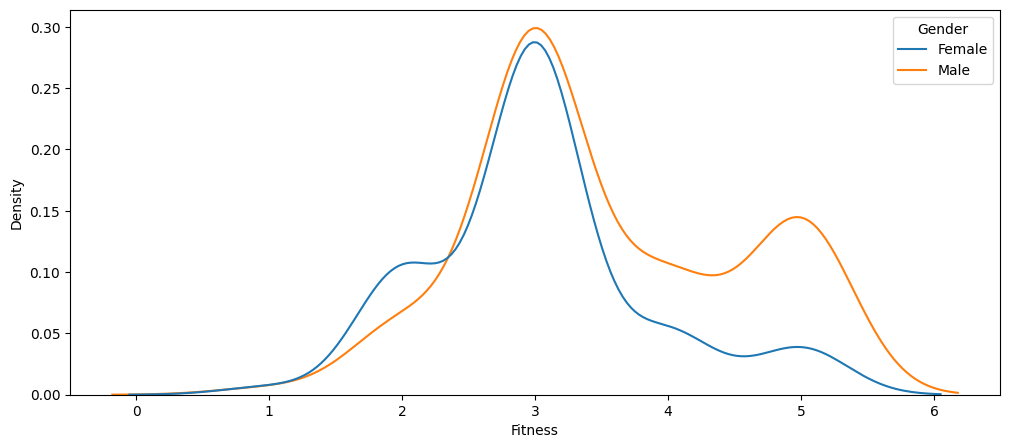

In [61]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Fitness',hue='Gender')
plt.show()

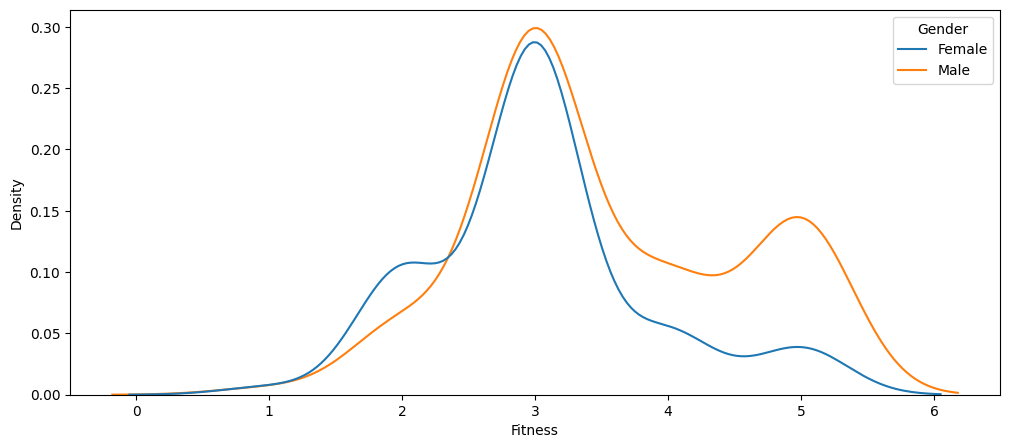

In [62]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Fitness',hue='Gender')
plt.show()

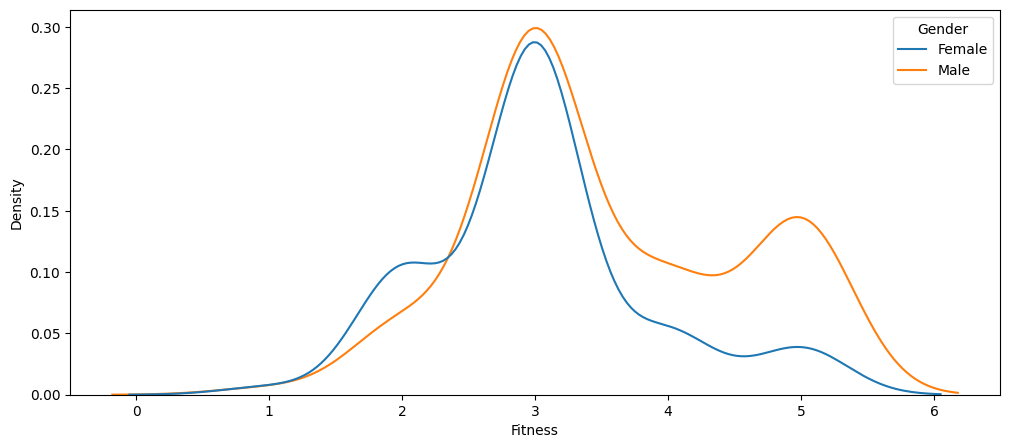

In [63]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Fitness',hue='Gender')
plt.show()

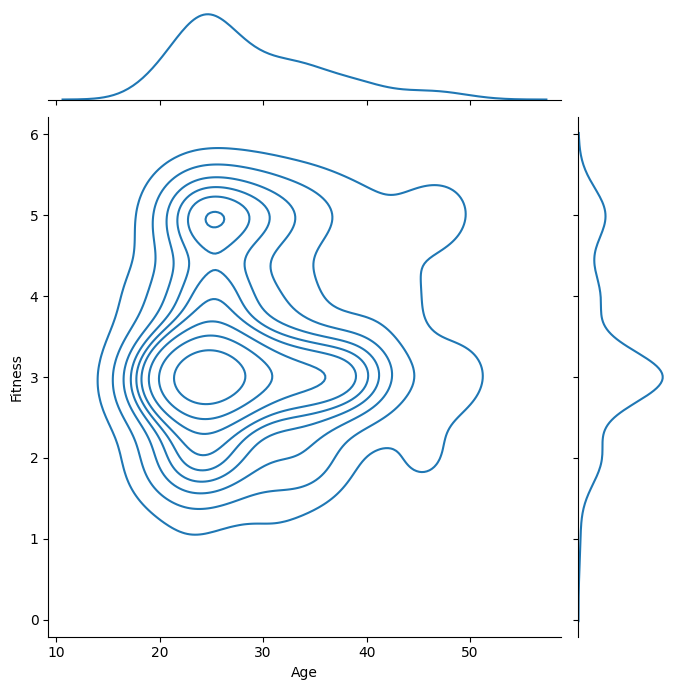

In [66]:
# Joint Histogram with KDE plot
sns.jointplot(x="Age", y="Fitness", data=data,height = 7,kind="kde")
plt.show()

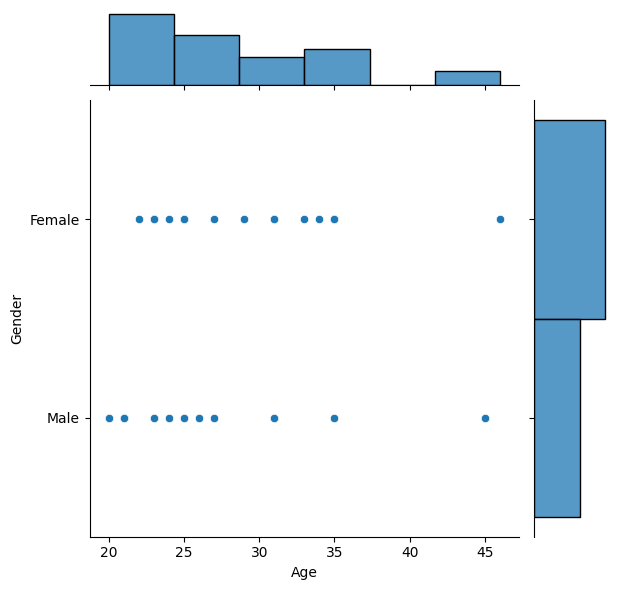

In [65]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=data[data.Fitness<3])
plt.show()

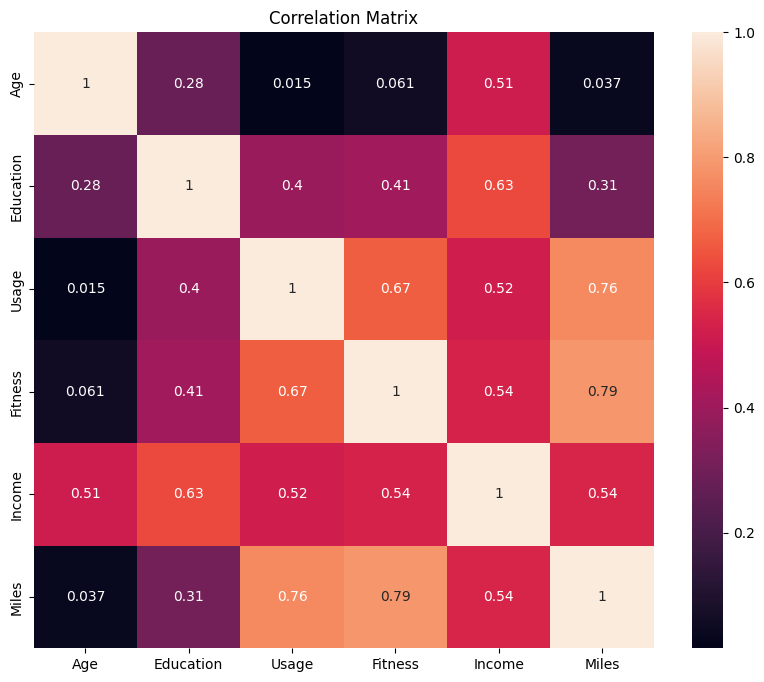

In [37]:
# Correlation Analysis

numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


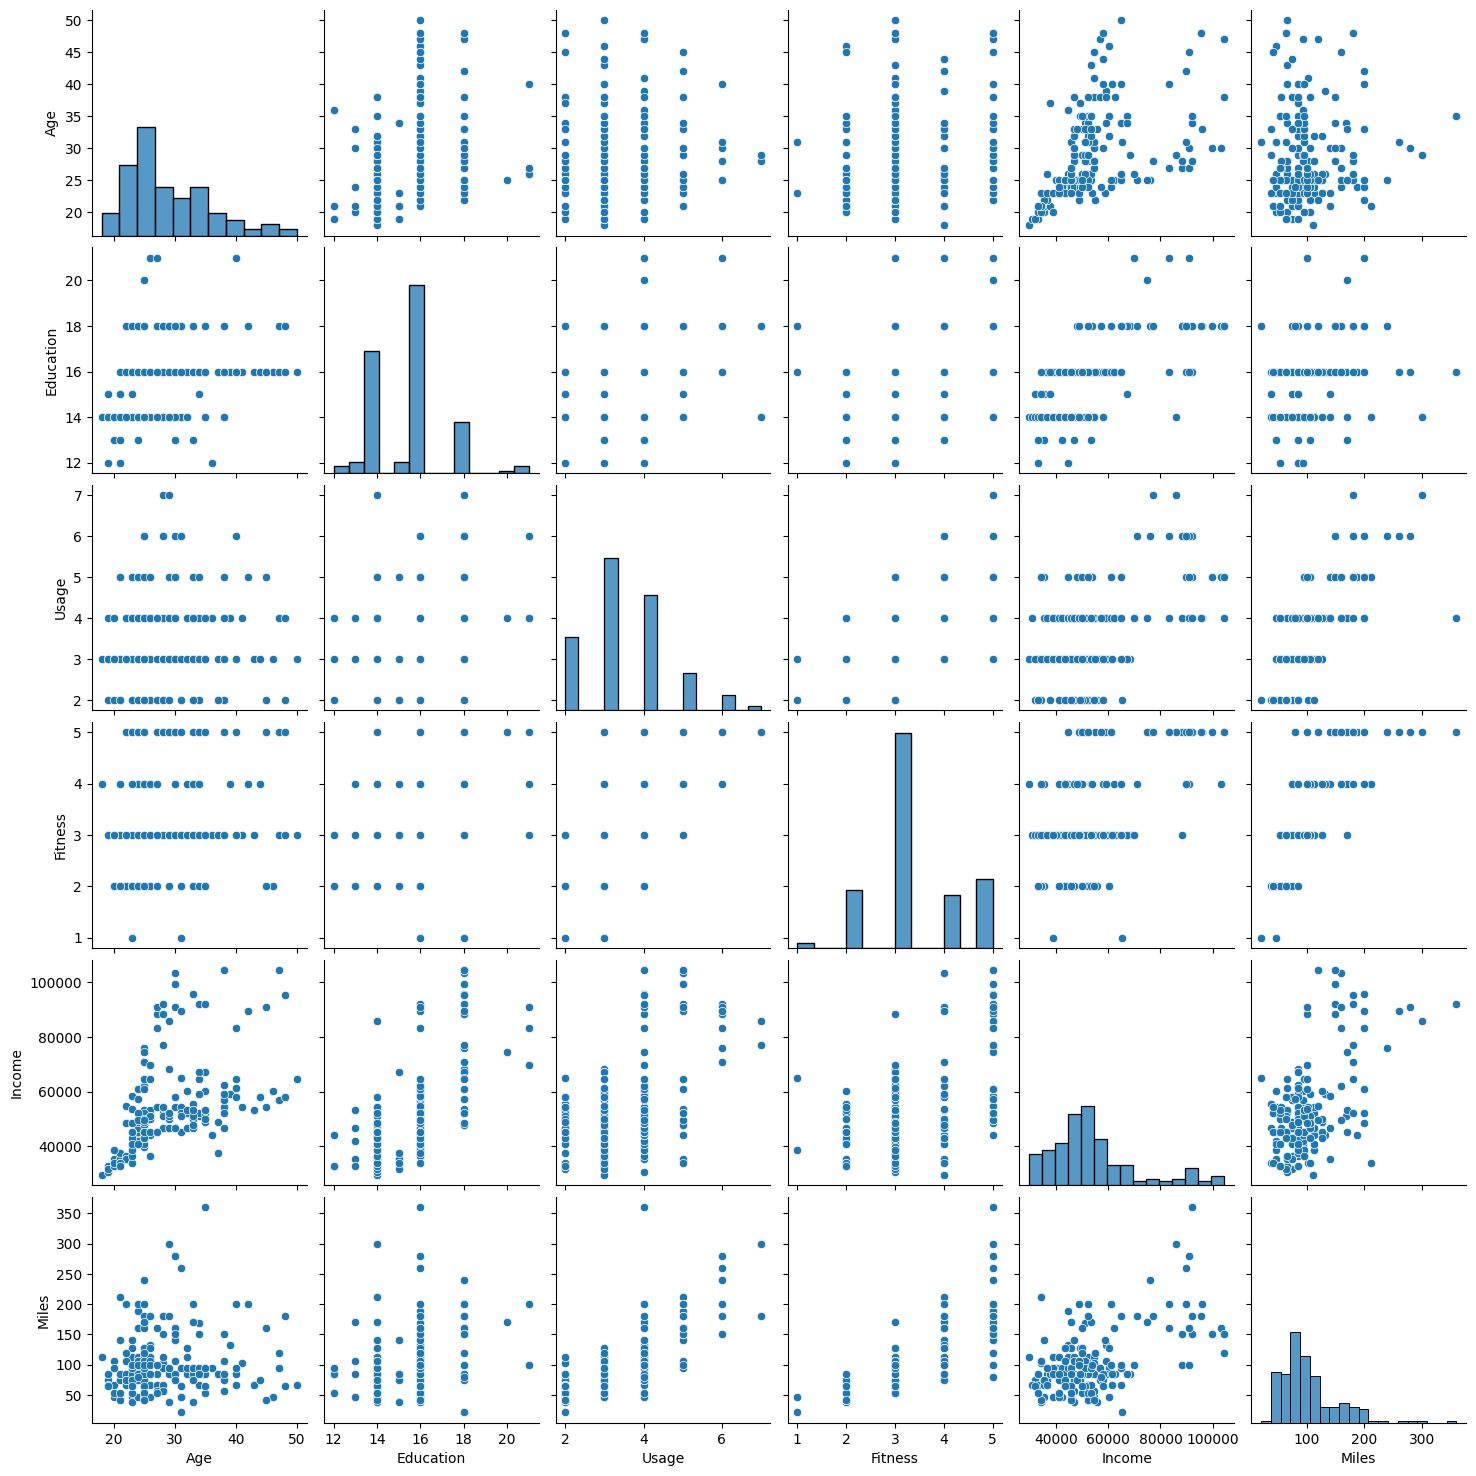

In [38]:
# Pairplots
sns.pairplot(data)
plt.show()


In [39]:
# Check for missing values

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

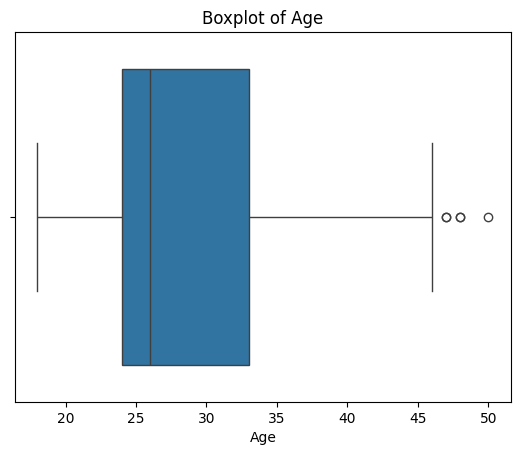

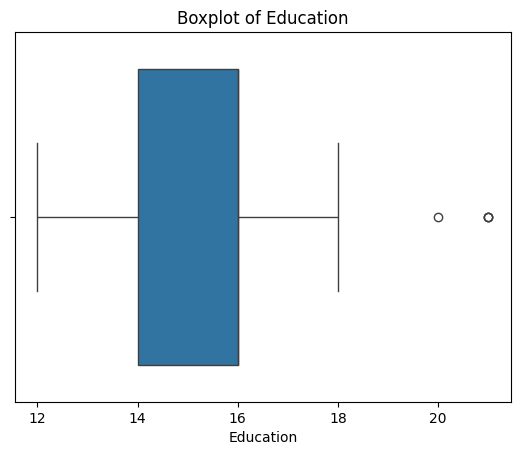

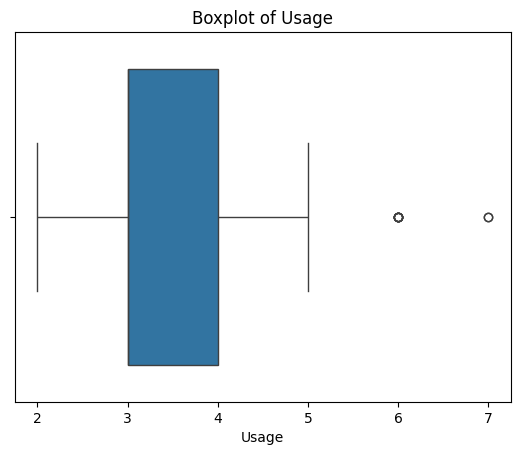

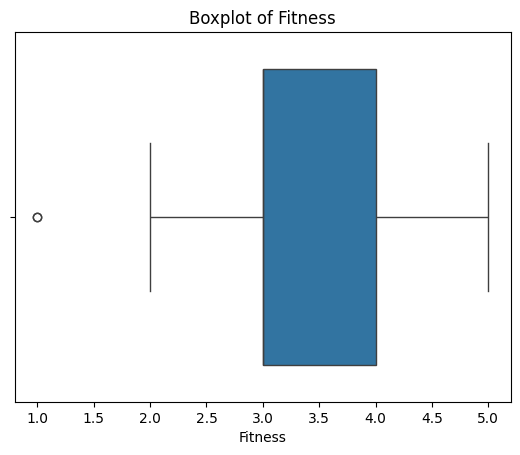

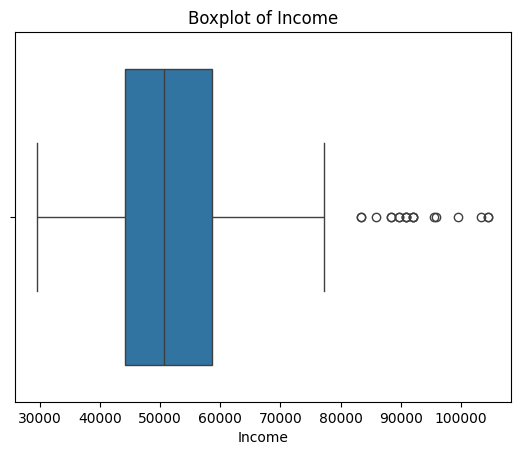

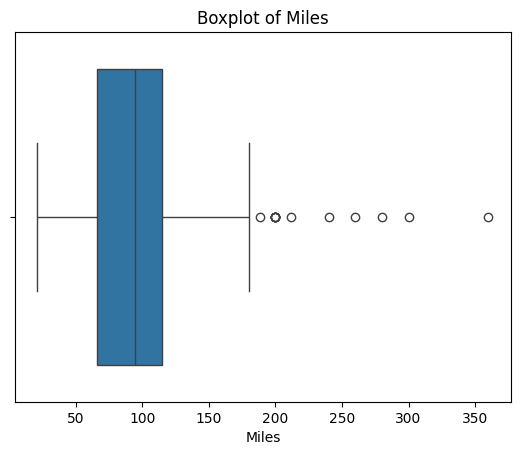

In [41]:
  # Check for outliers

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
  plt.figure()
  sns.boxplot(x=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# **Business Insights**

In [67]:
#Probability of buying KP281, KP481 & KP781
data.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [68]:
#Probability by gender
data.Gender.value_counts(normalize=True)


Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [69]:
#Probability by marital status
data.MaritalStatus.value_counts(normalize=True)


Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

# **Conditional and Marginal Probability**

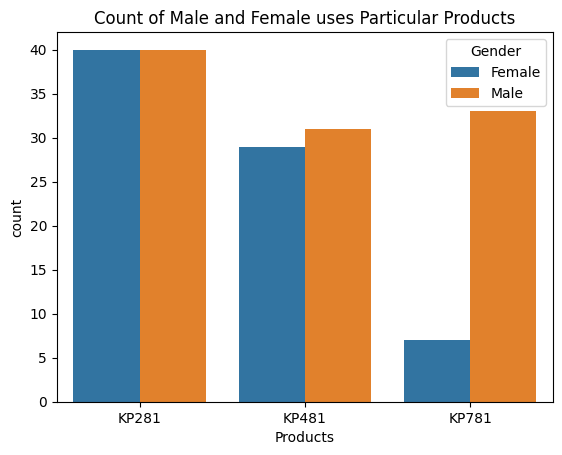

In [70]:
sns.countplot(x = "Product", data= data, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [73]:
pd.crosstab([data.Product],data.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [74]:
np.round(((pd.crosstab(data.Product,data.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [75]:
np.round((pd.crosstab([data.Product],data.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


# **Suggestions**

*   Since there aren't many women using the machine, we need to encourage them to work out more with a marketing campaign.
*   The KP281 and KP481 treadmills are liked by people making between 39000 dollars and 53000 dollars a year. We should advertise these as affordable options.
*   We should offer good customer support and suggest upgrading to better treadmills after using the basic ones for a while.
*   Targeting people over 40, especially with the KP781 treadmill, would be smart.
*   The KP781 treadmill is great for serious athletes and pros because it has more features. Let's promote it using influencers and athletes.











